In [330]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1 = finesse.kat()

kat.verbose=True

In [331]:
kat.parse("""


l laser 1 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  

mod sb1 55.5556M 0.3 1 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 refl                     #space b/w mod and PRM      ---> REFL <---

m ITM 0.98997 0.01 0 refl n4              #ITM
s ARM 3.3 n4 n5                        #ARM length 3.3
m ETM 0.99996 0.00001 0 n5 n6           #ETM


pd trans n6
pd circ n4
pd refl refl 


pd1 refl_I 55.5556M 0 refl
pd1 refl_Q 55.5556M 90 refl 

pd1 trans_I 55.5556M 0 n6
pd1 trans_Q 55.5556M 90 n6 


xaxis ETM phi lin -28 28 3500         


""")

--------------------------------------------------------------
Running kat - Started at 2022-10-13 19:10:15.477209
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 0.192338 seconds

--- Output info ---

Run date and time: 2022-10-13 19:10:15.477208
Detectors used: circ, refl, refl_I, refl_Q, trans, trans_I, trans_Q

One xaxis used: ['xaxis ETM phi lin -28 28 3500']
trans   : min = 1.220689634586520e-07 max = 3.751343047412010e-03
circ    : min = 1.220689634586520e-02 max = 3.751343047412010e+02
refl    : min = 9.734610767705670e-01 max = 9.997191734731580e-01
refl_I  : min = -2.414786681689970e-01 max = 2.414786681671180e-01
refl_Q  : min = -1.569088173347670e-01 max = 1.569088173318740e-01
trans_I : min = -1.216644358269230e-06 max = 1.216644361531830e-06
trans_Q : min = -1.872554675171370e-06 max = 1.872554676180080e-06


100% | ETA:  0:00:00 | Calculating                                             

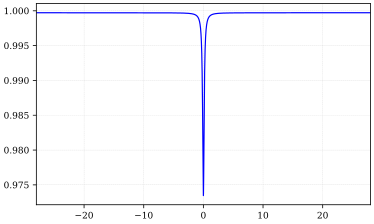

In [332]:
out = kat.run()
out.info()
plt.plot(out.x,out['refl'])

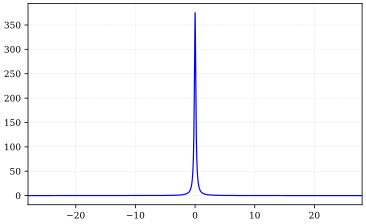

In [333]:
plt.plot(out.x,out['circ'])

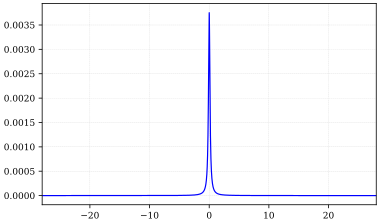

In [334]:
plt.plot(out.x,out['trans'])

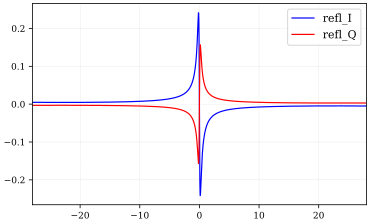

In [335]:
plt.plot(out.x,out['refl_I'],label="refl_I")
plt.plot(out.x,out['refl_Q'],label="refl_Q")
plt.legend()
plt.show()

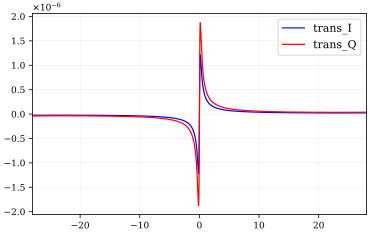

In [336]:
plt.plot(out.x,out['trans_I'],label="trans_I")
plt.plot(out.x,out['trans_Q'],label="trans_Q")
plt.legend()
plt.show()

kat1.parse("""
%----------------------------------------------------------------------------------------------------------
% Finesse input file to compute the alignment signals generated from a
% cavity in reflection using the Ward technique
% Paul Fulda 17.02.2012
%----------------------------------------------------------------------------------------------------------

l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 % Phase modulator f_mod=15MHz, modulation index=0.001
maxtem 3 % Include HG modes up to order 3
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 % Cavity end mirror with R=0.99, T=0.01, at zero tuning

s s2 0.1 n3 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump % Beam splitter with R=T=0.5 at zero tuning
s sQPD1 0.1 n9 n11 % Space 10cm length
s sQPD2 0.1 n10 n12 % Space 10cm length

cav cavity ITM n5 ETM n6 % Trace cavity eigenmode for the cavity (mirrors ITM and ETM)
trace 2 % Display results of cavity trace to terminal output
attr ETM Rc 1.3 % Add curvature with radius 1.3m to mirror ETM
attr ETM xbeta 0 % Add a variable for the angular tuning of mirror ETM
attr ITM xbeta 0 % Add a variable for the angular tuning of mirror ITM
pd1 PDrefl 15M 0 n8* % Photodetector with demodulation at 15MHz, demodulation phase 0

attr sQPD1 g 40 % Fix the Gouy phase shift the space QPDsplit2QPDrefl1 to 40 degrees
attr sQPD2 g 130 % Add 90 deg Gouy phase shift to the space QPDsplit2QPDrefl2

pd1 QPDrefl1 15M 0 n11 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl1 x-split % Specify that QPDrefl1 is a split photodiode

pd1 QPDrefl2 15M 0 n12 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl2 x-split % Specify that QPDrefl2 is a split photodiode

set err PDrefl re % Define the signal from PDrefl to be used to generate error signal
lock z $err 3000 10n % Generate feedback signal, gain of 3000, lock accuracy of 10ppm
put ETM phi $z % Apply feedback signal to the tuning of mirror ETM
noplot z % Don't plot the feedback signal
%xaxis ITM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ITM from 0 to 0.8mrad
xaxis ETM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ETM from 0 to 0.8mrad
""")

out = kat1.run()
out.info()
out.plot()

In [337]:
kat2 = finesse.kat()
kat2.parse("""
%----------------------------------------------------------------------------------------------------------
% Finesse input file to compute the alignment signals generated from a
% cavity in reflection using the Ward technique
% Paul Fulda 17.02.2012
%----------------------------------------------------------------------------------------------------------

l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 % Phase modulator f_mod=15MHz, modulation index=0.001
maxtem 3 % Include HG modes up to order 3
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 % Cavity end mirror with R=0.99, T=0.01, at zero tuning

s s2 0.1 n3 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump % Beam splitter with R=T=0.5 at zero tuning
s sQPD1 0.1 n9 n11 % Space 10cm length
s sQPD2 0.1 n10 n12 % Space 10cm length

cav cavity ITM n5 ETM n6 % Trace cavity eigenmode for the cavity (mirrors ITM and ETM)
trace 2 % Display results of cavity trace to terminal output
attr ETM Rc 1.3 % Add curvature with radius 1.3m to mirror ETM
attr ETM xbeta 0 % Add a variable for the angular tuning of mirror ETM
attr ITM xbeta 0 % Add a variable for the angular tuning of mirror ITM
pd1 PDrefl 15M 0 n8* % Photodetector with demodulation at 15MHz, demodulation phase 0

attr sQPD1 g 40 % Fix the Gouy phase shift the space QPDsplit2QPDrefl1 to 40 degrees
attr sQPD2 g 130 % Add 90 deg Gouy phase shift to the space QPDsplit2QPDrefl2

pd circ n5
pd trans n7
pd1 QPDrefl1 15M 0 n11 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl1 x-split % Specify that QPDrefl1 is a split photodiode

pd1 QPDrefl2 15M 0 n12 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl2 x-split % Specify that QPDrefl2 is a split photodiode

set err PDrefl re % Define the signal from PDrefl to be used to generate error signal
lock z $err 3000 10n % Generate feedback signal, gain of 3000, lock accuracy of 10ppm
put ETM phi $z % Apply feedback signal to the tuning of mirror ETM
noplot z % Don't plot the feedback signal
#xaxis ITM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ITM from 0 to 0.8mrad
xaxis ETM xbeta lin 0 0.8m 800 % Sweep misalignment of mirror ETM from 0 to 0.8mrad
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-10-13 19:10:18.127264


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 23.9329 seconds

--- Output info ---

Run date and time: 2022-10-13 19:10:18.127263
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 800']
PDrefl   : min = -2.710606748858710e-10 max = 9.999929503053680e-09
circ     : min = 9.000379520458041e-03 max = 8.999995501188940e+01
trans    : min = 9.000379520458041e-05 max = 8.999995501188940e-01
QPDrefl1 : min = -5.418627670599690e-09 max = 1.241754454937010e-05
QPDrefl2 : min = -6.475289444791260e-06 max = 6.798431827568280e-10
z        : min = 0.000000000000000e+00 max = 4.610240532770890e+01


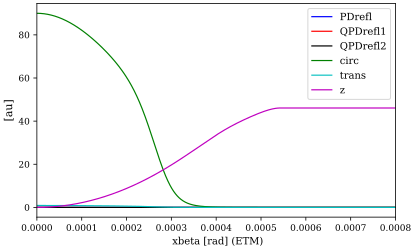

In [338]:
out1 = kat2.run()
out1.info()
out1.plot()

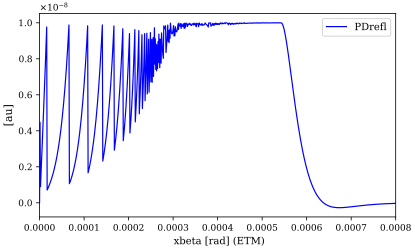

In [339]:
out1.plot(['PDrefl'])

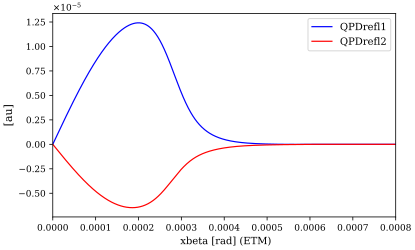

In [340]:
out1.plot(['QPDrefl1','QPDrefl2'])

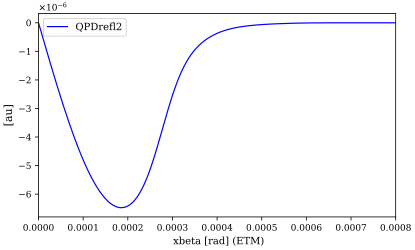

In [341]:
out1.plot(['QPDrefl2'])

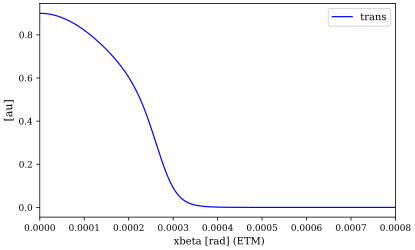

In [342]:
out1.plot(['trans'])

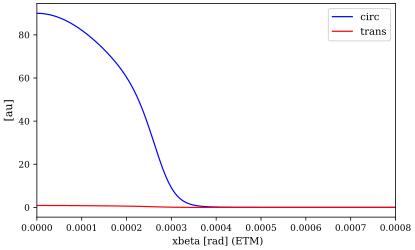

In [343]:
out1.plot(['circ','trans'])

In [344]:
kat3 = finesse.kat()
kat3.parse("""
%----------------------------------------------------------------------------------------------------------
% Finesse input file to compute the alignment signals generated from a
% cavity in reflection using the Ward technique
% Paul Fulda 17.02.2012
%----------------------------------------------------------------------------------------------------------

l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0 % Phase modulator f_mod=15MHz, modulation index=0.001
maxtem 3 % Include HG modes up to order 3
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 % Cavity end mirror with R=0.99, T=0.01, at zero tuning

s s2 0.1 n3 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump % Beam splitter with R=T=0.5 at zero tuning
s sQPD1 0.1 n9 n11 % Space 10cm length
s sQPD2 0.1 n10 n12 % Space 10cm length

cav cavity ITM n5 ETM n6 % Trace cavity eigenmode for the cavity (mirrors ITM and ETM)
trace 2 % Display results of cavity trace to terminal output
attr ETM Rc 1.3 % Add curvature with radius 1.3m to mirror ETM
attr ETM xbeta 0 % Add a variable for the angular tuning of mirror ETM
attr ITM xbeta 0 % Add a variable for the angular tuning of mirror ITM
pd1 PDrefl 15M 0 n8* % Photodetector with demodulation at 15MHz, demodulation phase 0

attr sQPD1 g 40 % Fix the Gouy phase shift the space QPDsplit2QPDrefl1 to 40 degrees
attr sQPD2 g 130 % Add 90 deg Gouy phase shift to the space QPDsplit2QPDrefl2

pd circ n5
pd1 QPDrefl1 15M 0 n11 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl1 x-split % Specify that QPDrefl1 is a split photodiode

pd1 QPDrefl2 15M 0 n12 % Photodetector with demodulation at 15MHz, demod. phase 0 deg
pdtype QPDrefl2 x-split % Specify that QPDrefl2 is a split photodiode

set err PDrefl re % Define the signal from PDrefl to be used to generate error signal
lock z $err 3000 10n % Generate feedback signal, gain of 3000, lock accuracy of 10ppm
put ETM phi $z % Apply feedback signal to the tuning of mirror ETM
noplot z % Don't plot the feedback signal
%xaxis ITM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ITM from 0 to 0.8mrad
xaxis ETM xbeta lin 0 0.8m 500 % Sweep misalignment of mirror ETM from 0 to 0.8mrad
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-10-13 19:10:45.171139


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 16.9581 seconds

--- Output info ---

Run date and time: 2022-10-13 19:10:45.171139
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 500']
PDrefl   : min = -2.709956641418250e-10 max = 9.999899532484640e-09
circ     : min = 9.000379616003289e-03 max = 8.999995501188940e+01
QPDrefl1 : min = -5.420913402927840e-09 max = 1.241783090838710e-05
QPDrefl2 : min = -6.474722901332150e-06 max = 6.797141649720540e-10
z        : min = 0.000000000000000e+00 max = 4.610126023729700e+01


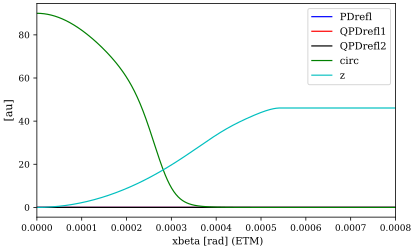

In [345]:
out2 = kat3.run()
out2.info()
out2.plot()

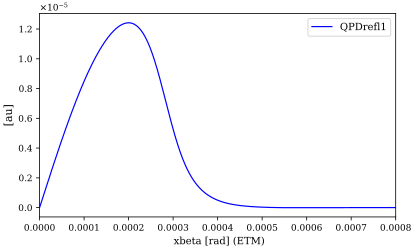

In [346]:
out2.plot(['QPDrefl1'])

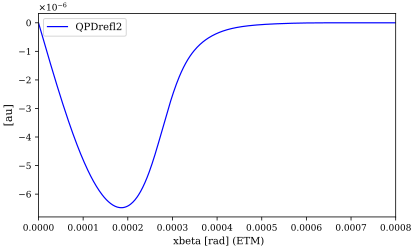

In [347]:
out2.plot(['QPDrefl2'])

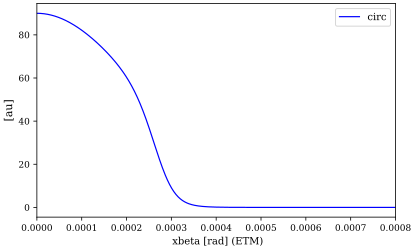

In [348]:
out2.plot(['circ'])

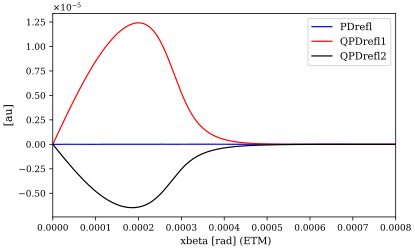

In [349]:
out2.plot(['QPDrefl1','QPDrefl2','PDrefl'])

In [350]:
kat4 = finesse.kat()
kat4.parse("""


l laser 1 0 nin % Laser P=1W f_offset=0Hz
mod EOM 201M 0.001 1 pm nin n0 
maxtem 3 
s s0 0 n0 n1
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3 
s s1 0.1 n2 n4 % Space 10cm length
m ITM 0.99 0.01 0 n4 n5 
s scavity 1 n5 n6 % Space 1m length
m ETM 0.99 0.01 0 n6 n7 

s s2 0.1 n7 n8 % Space 10cm length
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump
s sQPD1 0.1 n9 n11  
s sQPD2 0.1 n10 n12 

cav cavity ITM n5 ETM n6 
trace 2
attr ETM Rc 1.3  
attr ETM xbeta 0 
attr ITM xbeta 0 
pd1 PDrefl 201M 150 n4 
pd1 PDtrans 201M 0 n7
pd PDtrans1 n7
pd circ n5
attr sQPD1 g 50  
attr sQPD2 g 140 

pd1 QPDtrans1 201M 0 n11
pdtype QPDtrans1 x-split
 
 
pd1 QPDtrans2 201M 90 n12 
pdtype QPDtrans2 x-split  

lock z $err 2500 10n 
set err PDrefl re 
put ETM phi $z 
noplot z 
#xaxis ITM xbeta lin 0 0.8m 500 
xaxis ETM xbeta lin 0 0.8m 500
#xaxis ITM phi lin 0 -30 5000 
""")

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-10-13 19:11:04.752039


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 20.9164 seconds

--- Output info ---

Run date and time: 2022-10-13 19:11:04.752038
Detectors used: PDrefl, PDtrans, PDtrans1, QPDtrans1, QPDtrans2, circ, z

One xaxis used: ['xaxis ETM xbeta lin 0 0.0008 500']
PDrefl    : min = -8.909164056367319e-09 max = 9.999943387087450e-09
PDtrans   : min = 0.000000000000000e+00 max = 2.226084015168900e-06
PDtrans1  : min = 5.012096257478950e-05 max = 8.999995500148330e-01
circ      : min = 5.012096257478950e-03 max = 8.999995500148330e+01
QPDtrans1 : min = -3.093692316392030e-11 max = 2.657810815558480e-05
QPDtrans2 : min = -2.244372326260500e-05 max = 1.623685137390220e-07
z         : min = -6.133862623270840e+01 max = 0.000000000000000e+00


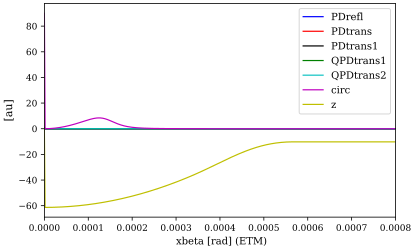

In [351]:
out3 = kat4.run()
out3.info()
out3.plot()
#print((out3['PDrefl'][2502]-out3['PDrefl'][2498])/(out3.x[2502]-out3.x[2498]))

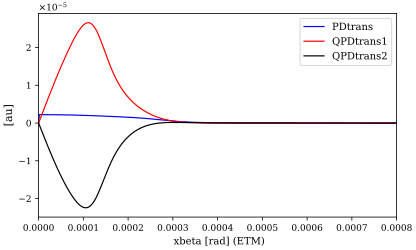

In [352]:
out3.plot(['QPDtrans1','QPDtrans2','PDtrans'])


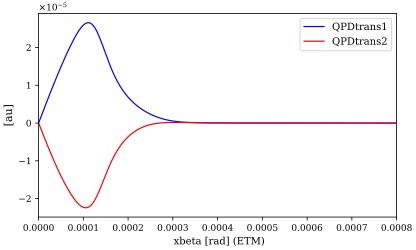

In [353]:
out3.plot(['QPDtrans1','QPDtrans2'])

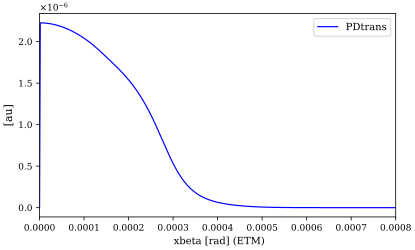

In [354]:
out3.plot(['PDtrans'])

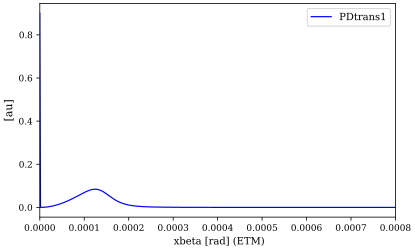

In [355]:
out3.plot(['PDtrans1'])

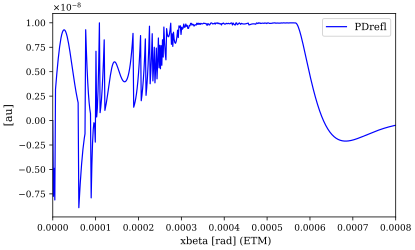

In [356]:
out3.plot(['PDrefl'])

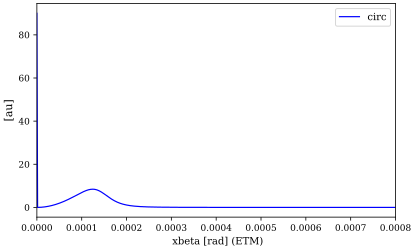

In [357]:
out3.plot(['circ'])